# Assignment 1Solution: Feature Engineering on Housing Dataset

*Note:* Here, I have provided only code for Assignment-1 without any markdowns/insights. This should be only used as a code reference and should not be viewed as a template for subsequent assignments. 

You should ALWYAS add markdowns containing your explanations, insights and rationales and would be penalized for not using markdown blocks. 

In [12]:
# import libraries only ONCE
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Reading in the data and dropping duplicates
housing_df = pd.read_csv('train.csv')
housing_df = housing_df.drop_duplicates()

# Selecting all relevant columns (includes features and labels)
selected_columns_df = housing_df[["LotShape", "LotConfig", "Neighborhood", "OverallQual", "OverallCond", "YearRemodAdd", "GrLivArea", "MoSold", "SalePrice"]]

# Dropping any incomplete columns (columns with nan values)
selected_columns_df = selected_columns_df.dropna()

housing_features_df = selected_columns_df[["LotShape", "LotConfig", "Neighborhood", "OverallQual", "OverallCond", "YearRemodAdd", "GrLivArea", "MoSold"]]
housing_features_df.head()

sales_price_df  = selected_columns_df[['SalePrice']]
sales_price_df.head()

# We have only three categorical nominal features:
# - LotShape 
# - LotConfig 
# - Neighborhood

# Transforming categorical nominal features into 1-hot encodings

lotshape_list = housing_features_df["LotShape"].to_list()
lotconfig_list = housing_features_df["LotConfig"].to_list()
neighborhood_list = housing_features_df["Neighborhood"].to_list()

# Convert to list of lists that scikit learn 1-hot encoder expects
lotshape_list_of_list = [[el] for el in lotshape_list]
lotconfig_list_of_list = [[el] for el in lotconfig_list]
neighborhood_list_of_list = [[el] for el in neighborhood_list]

lotshape_encoder = OneHotEncoder()
lotconfig_encoder = OneHotEncoder()
neighborhood_encoder = OneHotEncoder()

# Fit the data 
lotshape_transformed = lotshape_encoder.fit_transform(lotshape_list_of_list)
lotconfig_transformed = lotconfig_encoder.fit_transform(lotconfig_list_of_list)
neighborhood_transformed = neighborhood_encoder.fit_transform(neighborhood_list_of_list)

# Create numpy matrices
lotshape_transformed = lotshape_transformed.toarray()
lotconfig_transformed = lotconfig_transformed.toarray()
neighborhood_transformed = neighborhood_transformed.toarray()

# Merging the 1-hot vectors back to the dataframe
lotshape_transformed_df = pd.DataFrame(lotshape_transformed)
lotconfig_transformed_df = pd.DataFrame(lotconfig_transformed)
neighborhood_transformed_df = pd.DataFrame(neighborhood_transformed)

# Sanity check for 1-hot vector sizes 
# - LotShape should result in a 1-hot vector of size 4
# - LotConfig should result in a 1-hot vector of size 5
# - Neighborhood should result in a 1-hot vector of size 25
print(f"LotShape 1-hot shape = {lotshape_transformed_df.shape}")
print(f"LotConfig 1-hot shape = {lotconfig_transformed_df.shape}")
print(f"Neighborhood 1-hot shape = {neighborhood_transformed_df.shape}")

# Concatenate back into the dataframe 
housing_features_df.reset_index(drop=True, inplace=True)
lotshape_transformed_df.reset_index(drop=True, inplace=True)
lotconfig_transformed_df.reset_index(drop=True, inplace=True)
neighborhood_transformed_df.reset_index(drop=True, inplace=True)

housing_features_transformed_df = pd.concat([housing_features_df, lotshape_transformed_df, lotconfig_transformed_df, neighborhood_transformed_df], axis=1)

# Total columns we have  = 8 (original) + 4 + 5 + 25 
# So, this should print 1460 * 42
print(f"Shape of data after concatenating all 1-hot encodings = {housing_features_transformed_df.shape}")

# Now drop columns we have already transformed into 1-hot
housing_features_transformed_df = housing_features_transformed_df.drop(columns=["LotShape", "LotConfig", "Neighborhood"], axis=1)
# Now, let's print the shape of our final data (should be 1460 * 39)
print(f"Shape of data after droping original categorical columns = {housing_features_transformed_df.shape}")

# Extra Credit : We are using MinMax Scaling
# It is debatable if we should scale categorical ordinal features such as "YearRemodAdd" and "MoSold"
# I have scaled everything for the sake of simplicity
scaler = MinMaxScaler()
housing_features_transformed_df[['OverallQual', 'OverallCond', 'YearRemodAdd','GrLivArea','MoSold']] = scaler.fit_transform(housing_features_transformed_df[['OverallQual', 'OverallCond', 'YearRemodAdd','GrLivArea','MoSold']])

housing_features_transformed_df.head()

LotShape 1-hot shape = (1460, 4)
LotConfig 1-hot shape = (1460, 5)
Neighborhood 1-hot shape = (1460, 25)
Shape of data after concatenating all 1-hot encodings = (1460, 42)
Shape of data after droping original categorical columns = (1460, 39)


,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,0,1,2,3,0,...,15,16,17,18,19,20,21,22,23,24
0,0.666667,0.500,0.883333,0.259231,0.090909,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.555556,0.875,0.433333,0.174830,0.363636,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.666667,0.500,0.866667,0.273549,0.727273,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.500,0.333333,0.260550,0.090909,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.500,0.833333,0.351168,1.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Carla Gonzalez
##### Monday Feb 6

# Assignment 2: Linear Regression

### 1.0 Data Splitting: split dataset into training, validation and test splits (80%, 10%, 10%)

In [13]:
# import libraries 
from sklearn.model_selection import train_test_split

#transform dataframes to numpy arrays
features_h = housing_features_transformed_df.to_numpy()
labels_h = sales_price_df.to_numpy()

print (f"Features' shape =  {features.shape}")
print (f"Label's shape  = {labels.shape}")

Features' shape =  (1460, 39)
Label's shape  = (1460, 1)


In [14]:
#test data
x_, x_test, y_, y_test = train_test_split(features_h, labels_h, test_size=0.10, random_state=42)

#validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.10, random_state=42)

print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}")

print (f"Validation: Features' shape [no. of examples * feature vector size] =  {x_valid.shape}")
print (f"Validation: Label's shape [no. of examples * 1] = {y_valid.shape}")

print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}")


Training: Features' shape [no. of examples * feature vector size] =  (1182, 39)
Training: Label's shape [no. of examples * 1] = (1182, 1)
Validation: Features' shape [no. of examples * feature vector size] =  (132, 39)
Validation: Label's shape [no. of examples * 1] = (132, 1)
Test: Features' shape [no. of examples * feature vector size] =  (146, 39)
Test: Label's shape [no. of examples * 1] = (146, 1)


### 2.0 Train Linear Regresion Model: Train our linear regression model using scikit-learn's LinearRegression module. 

In [15]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

regression = LinearRegression(copy_X=True)
y_train = y_train.flatten()

# training model
regression = regression.fit(x_train, y_train)

print ("Training complete")

Training complete


In [16]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

y_test = y_test.flatten()
y_test_predicted = regression.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation.statistic}")


Mean Squared Error on training data 1765874717.0479453
Mean Absolute Error on training data 23367.294520547945
Pearson correlation coefficient between training and test data is 0.9069939292736742


### Interpret evaluation results

A Mean Absolute Error of +-23,367 shows the predicting price from the model can deviate 23 thousands dlls, which is not so bad.
It can definitevely can be better but not bad for a start. 

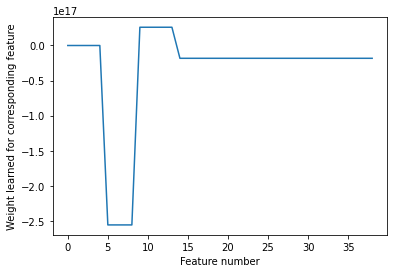

In [17]:
from matplotlib import pyplot as plt

weights = regression.coef_
plt.plot(range(len(weights)), weights)
plt.xlabel("Feature number")
plt.ylabel("Weight learned for corresponding feature")
plt.show()

As we learned in class, a feature impact can be measured with its distance to 0, so as we can see in the graph:
- LotShape: no impact
- LotConfig: biggest impact, 5
- Neighborhood: also has the biggest impact, 5
- OverallQual: no impact
- OverallCond: no impact
- YearRemodAdd: no impact
- GrLivArea: no impact
- MoSold: no impact
- SalePrice: no impact